# IMA Database of Mineral Properties

Minerals data by international mineralogical Association.

### Introduction

In this report, I investigated the IMA database of mineral properties. The dataset contains mineral names, unique formula(RRUFF and IMA) in plain text(f.e., Abellaite is NaPb2+2(CO2)2(OH) which means NaPb2+(CO3)2(OH), IMA numbers, RRUFF IDs, Chemistry elements, countries of locality, Structural Group and Age.



## Problem Statement

To Identify:

How many minerals were approved?

Which crystal system does the mineral have.

What is the oldest known Age?

The most abundant chemical elements.

Which country has the highest number of minerals.




### The following questions will be answered:


(a) What is the most abundant chemical elements?


(b) Regions where minerals are more common.


(c) The oldest known age.


(d) Properties of the minerals.


(e) Mineral Status.


The data was downloaded from Kaggle datasets:
 https://www.kaggle.com/datasets/lsind18/ima-database-of-mineral-properties/download?datasetVersionNumber=2

## Import Libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
!pip install nltk

!pip install wordcloud
from wordcloud import WordCloud

In [30]:
#Load  the dataset
mineral = pd.read_csv('RRUFF_Export_20230608_052338.csv')

In [31]:
mineral

,Mineral Name,RRUFF Chemistry (plain),IMA Chemistry (plain),Chemistry Elements,IMA Number,RRUFF IDs,Country of Type Locality,Year First Published,IMA Status,Structural Groupname,Fleischers Groupname,Status Notes,Crystal Systems,Space Groups,Oldest Known Age (Ma),Valence Elements,Paragenetic Modes
0,Abellaite,NaPb2+2(CO3)2(OH),NaPb2(CO3)2(OH),Na Pb C O H,IMA2014-111,NaN,Spain,2014,Approved,Not in a structural group,,"Ibáñez-Insa J, Elvira J J, Llovet X, Pérez-Can...",hexagonal,P31c|P6_3mc,370.0,Na Pb^2+ C O H,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
1,Abelsonite,Ni2+C31H32N4,NiC31H32N4,Ni C H N,IMA1975-013,R070007,USA,1975,Approved,Not in a structural group,,"Milton C, Dwornik E J, Estep-Barnes P A, Finke...",triclinic,P-1,56.0,Ni^2+ C H N,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
2,Abenakiite-(Ce),Na26Ce3+6(SiO3)6(PO4)6(C4+O3)6(S4+O2)O,Na26Ce6(Si6O18)(PO4)6(CO3)6(SO2)O,Na Ce Si O P C S,IMA1991-054,NaN,Canada,1991,Approved,Not in a structural group,,"McDonald A M, Chao G Y, Grice J D (1994) Abena...",hexagonal,R-3,124.0,Na Ce^3+ Si O P C^4+ S^4+,"Abiotic, Primary; Stage 4b: Highly evolved ign..."
3,Abernathyite,K(U6+O2)As5+O4·3H2O,K(UO2)(AsO4)·3H2O,K U O As H,NaN,NaN,USA,1956,"Approved,Grandfathered",Natroautunite,autunite,"Thompson M E, Ingram B, Gross E B (1956) Abern...",tetragonal,P4/nmm|P4/ncc,358.9,K U^6+ O As^5+ H,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
4,Abhurite,Sn2+21O6(OH)14Cl16,Sn2+21O6(OH)14Cl16,Sn O H Cl,IMA1983-061,R060227,Saudi Arabia,1983,Approved,Not in a structural group,,"Matzko J J, Evans H T, Mrose M E, Aruscavage P...",hexagonal,R32,0.0,Sn^2+ O H Cl,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5899,Zvĕstovite-(Zn),Ag1+6(Ag1+4Zn2+2)As3+4S2-13,Ag6(Ag4Zn2)As4S13,Ag Zn As S,IMA2020-061,NaN,Czech Republic,2020,Approved,Tetrahedrite,,"Sejkora J, Biagioni C, Vrtiška L, Moëlo Y (202...",cubic,I-43m,NaN,Ag^1+ Zn^2+ As^3+ S^2-,"Abiotic, Primary; Stage 4a: Earth's earliest c..."
5900,Zvyaginite,Na2Zn2+Ti4+Nb5+2(Si2O7)2O2(OH)2(H2O)4,Na2ZnTiNb2(Si2O7)2O2(OH)2(H2O)4,Na Zn Ti Nb Si O H,IMA2013-071,NaN,Russia,2013,"Approved,Redefined",Seidozerite-Lamprophyllite,,"Pekov I V, Lykova I S, Chukanov N V, Yapaskurt...",triclinic,P-1,370.0,Na Zn^2+ Ti^4+ Nb^5+ Si O H,"Abiotic, Primary; Stage 4b: Highly evolved ign..."
5901,Zvyagintsevite,Pd3Pb,Pd3Pb,Pd Pb,IMA1966-006,NaN,Russia,1966,Approved,"Perovskite, Auricupride",zvyagintsevite,"Genkin A D, Murav´eva I V, Troneva N V (1966) ...",cubic,Pm3m,3100.0,Pd Pb,"Abiotic, Primary, Secondary; Stage 2: Planetes..."
5902,Zwieselite,Fe2+2PO4F,Fe2+2(PO4)F,Fe P O F,NaN,R050279,Germany,1841,"Approved,Redefined",Triplite,triplite,Breithaupt J F A (1841) Phyletites ferrosus od...,monoclinic,I2/a,1820.0,Fe^2+ P O F,"Abiotic, Primary; Stage 4b: Highly evolved ign..."


In [32]:
#preview the dataset
mineral.head()

,Mineral Name,RRUFF Chemistry (plain),IMA Chemistry (plain),Chemistry Elements,IMA Number,RRUFF IDs,Country of Type Locality,Year First Published,IMA Status,Structural Groupname,Fleischers Groupname,Status Notes,Crystal Systems,Space Groups,Oldest Known Age (Ma),Valence Elements,Paragenetic Modes
0,Abellaite,NaPb2+2(CO3)2(OH),NaPb2(CO3)2(OH),Na Pb C O H,IMA2014-111,NaN,Spain,2014,Approved,Not in a structural group,,"Ibáñez-Insa J, Elvira J J, Llovet X, Pérez-Can...",hexagonal,P31c|P6_3mc,370.0,Na Pb^2+ C O H,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
1,Abelsonite,Ni2+C31H32N4,NiC31H32N4,Ni C H N,IMA1975-013,R070007,USA,1975,Approved,Not in a structural group,,"Milton C, Dwornik E J, Estep-Barnes P A, Finke...",triclinic,P-1,56.0,Ni^2+ C H N,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
2,Abenakiite-(Ce),Na26Ce3+6(SiO3)6(PO4)6(C4+O3)6(S4+O2)O,Na26Ce6(Si6O18)(PO4)6(CO3)6(SO2)O,Na Ce Si O P C S,IMA1991-054,NaN,Canada,1991,Approved,Not in a structural group,,"McDonald A M, Chao G Y, Grice J D (1994) Abena...",hexagonal,R-3,124.0,Na Ce^3+ Si O P C^4+ S^4+,"Abiotic, Primary; Stage 4b: Highly evolved ign..."
3,Abernathyite,K(U6+O2)As5+O4·3H2O,K(UO2)(AsO4)·3H2O,K U O As H,NaN,NaN,USA,1956,"Approved,Grandfathered",Natroautunite,autunite,"Thompson M E, Ingram B, Gross E B (1956) Abern...",tetragonal,P4/nmm|P4/ncc,358.9,K U^6+ O As^5+ H,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
4,Abhurite,Sn2+21O6(OH)14Cl16,Sn2+21O6(OH)14Cl16,Sn O H Cl,IMA1983-061,R060227,Saudi Arabia,1983,Approved,Not in a structural group,,"Matzko J J, Evans H T, Mrose M E, Aruscavage P...",hexagonal,R32,0.0,Sn^2+ O H Cl,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."


In [33]:
mineral.tail()

,Mineral Name,RRUFF Chemistry (plain),IMA Chemistry (plain),Chemistry Elements,IMA Number,RRUFF IDs,Country of Type Locality,Year First Published,IMA Status,Structural Groupname,Fleischers Groupname,Status Notes,Crystal Systems,Space Groups,Oldest Known Age (Ma),Valence Elements,Paragenetic Modes
5899,Zvĕstovite-(Zn),Ag1+6(Ag1+4Zn2+2)As3+4S2-13,Ag6(Ag4Zn2)As4S13,Ag Zn As S,IMA2020-061,NaN,Czech Republic,2020,Approved,Tetrahedrite,,"Sejkora J, Biagioni C, Vrtiška L, Moëlo Y (202...",cubic,I-43m,NaN,Ag^1+ Zn^2+ As^3+ S^2-,"Abiotic, Primary; Stage 4a: Earth's earliest c..."
5900,Zvyaginite,Na2Zn2+Ti4+Nb5+2(Si2O7)2O2(OH)2(H2O)4,Na2ZnTiNb2(Si2O7)2O2(OH)2(H2O)4,Na Zn Ti Nb Si O H,IMA2013-071,NaN,Russia,2013,"Approved,Redefined",Seidozerite-Lamprophyllite,,"Pekov I V, Lykova I S, Chukanov N V, Yapaskurt...",triclinic,P-1,370.0,Na Zn^2+ Ti^4+ Nb^5+ Si O H,"Abiotic, Primary; Stage 4b: Highly evolved ign..."
5901,Zvyagintsevite,Pd3Pb,Pd3Pb,Pd Pb,IMA1966-006,NaN,Russia,1966,Approved,"Perovskite, Auricupride",zvyagintsevite,"Genkin A D, Murav´eva I V, Troneva N V (1966) ...",cubic,Pm3m,3100.0,Pd Pb,"Abiotic, Primary, Secondary; Stage 2: Planetes..."
5902,Zwieselite,Fe2+2PO4F,Fe2+2(PO4)F,Fe P O F,NaN,R050279,Germany,1841,"Approved,Redefined",Triplite,triplite,Breithaupt J F A (1841) Phyletites ferrosus od...,monoclinic,I2/a,1820.0,Fe^2+ P O F,"Abiotic, Primary; Stage 4b: Highly evolved ign..."
5903,Zýkaite,Fe3+4(As5+O4)3S6+O4(OH)·15H2O,Fe3+4(AsO4)3(SO4)(OH)·15H2O,Fe As O S H,IMA1976-039,R070477,Czech Republic,1976,Approved,,,"Čech F, Jansa J, Novák F (1978) Zýkaite, Fe^3+...",orthorhombic|unknown,NaN,0.0,Fe^3+ As^5+ O S^6+ H,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."


In [34]:
 #.info() function is used to understand the data types, numbers of columns, number of rows and memory storage of the data.
mineral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5904 entries, 0 to 5903
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Mineral Name              5904 non-null   object 
 1   RRUFF Chemistry (plain)   5904 non-null   object 
 2   IMA Chemistry (plain)     5904 non-null   object 
 3   Chemistry Elements        5904 non-null   object 
 4   IMA Number                4296 non-null   object 
 5   RRUFF IDs                 2306 non-null   object 
 6   Country of Type Locality  5904 non-null   object 
 7   Year First Published      5904 non-null   int64  
 8   IMA Status                5903 non-null   object 
 9   Structural Groupname      5904 non-null   object 
 10  Fleischers Groupname      5904 non-null   object 
 11  Status Notes              5899 non-null   object 
 12  Crystal Systems           5634 non-null   object 
 13  Space Groups              5159 non-null   object 
 14  Oldest K

In [35]:
#Summary statistics of  the dataset
mineral.describe()

,Year First Published,Oldest Known Age (Ma)
count,5904.000000,4824.000000
mean,1953.666836,1271.835004
std,165.467163,1212.914533
min,0.000000,0.000000
25%,1951.000000,305.000000
50%,1982.000000,601.000000
75%,2009.000000,2058.000000
max,2023.000000,4700.000000


In [36]:
#Lets get the shape of the dataset.
mineral.shape

(5904, 17)

There are 14 columns (or features) in this dataset.

In [37]:
#List all columns names
mineral.columns

Index(['Mineral Name', 'RRUFF Chemistry (plain)', 'IMA Chemistry (plain)',
       'Chemistry Elements', 'IMA Number', 'RRUFF IDs',
       'Country of Type Locality', 'Year First Published', 'IMA Status',
       'Structural Groupname', 'Fleischers Groupname', 'Status Notes',
       'Crystal Systems', 'Space Groups', 'Oldest Known Age (Ma)',
       'Valence Elements', 'Paragenetic Modes'],
      dtype='object')

## Data Cleaning

Checking for null values, drop rows with null values..
mineral.isna()

In [38]:
#let count for the number of null values
mineral.isna().sum()

Mineral Name                   0
RRUFF Chemistry (plain)        0
IMA Chemistry (plain)          0
Chemistry Elements             0
IMA Number                  1608
RRUFF IDs                   3598
Country of Type Locality       0
Year First Published           0
IMA Status                     1
Structural Groupname           0
Fleischers Groupname           0
Status Notes                   5
Crystal Systems              270
Space Groups                 745
Oldest Known Age (Ma)       1080
Valence Elements               0
Paragenetic Modes             59
dtype: int64

from the column, 7 columns has null values; IMA Number, RRUFF IDs, IMA Status, Status Notes, Crystal Systems, Space Groups, Oldest Known Age and Paragenetic Modes.

In [39]:
#Calculating mean value of Oldest Known Age(Ma)
x = mineral['Oldest Known Age (Ma)'].mean()
print(x)

1271.835003936567


In [40]:
#Filling the null value of Oldest Known Age(Ma)
mineral['Oldest Known Age (Ma)'].fillna(x, inplace=True)

In [41]:
mineral

,Mineral Name,RRUFF Chemistry (plain),IMA Chemistry (plain),Chemistry Elements,IMA Number,RRUFF IDs,Country of Type Locality,Year First Published,IMA Status,Structural Groupname,Fleischers Groupname,Status Notes,Crystal Systems,Space Groups,Oldest Known Age (Ma),Valence Elements,Paragenetic Modes
0,Abellaite,NaPb2+2(CO3)2(OH),NaPb2(CO3)2(OH),Na Pb C O H,IMA2014-111,NaN,Spain,2014,Approved,Not in a structural group,,"Ibáñez-Insa J, Elvira J J, Llovet X, Pérez-Can...",hexagonal,P31c|P6_3mc,370.000000,Na Pb^2+ C O H,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
1,Abelsonite,Ni2+C31H32N4,NiC31H32N4,Ni C H N,IMA1975-013,R070007,USA,1975,Approved,Not in a structural group,,"Milton C, Dwornik E J, Estep-Barnes P A, Finke...",triclinic,P-1,56.000000,Ni^2+ C H N,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
2,Abenakiite-(Ce),Na26Ce3+6(SiO3)6(PO4)6(C4+O3)6(S4+O2)O,Na26Ce6(Si6O18)(PO4)6(CO3)6(SO2)O,Na Ce Si O P C S,IMA1991-054,NaN,Canada,1991,Approved,Not in a structural group,,"McDonald A M, Chao G Y, Grice J D (1994) Abena...",hexagonal,R-3,124.000000,Na Ce^3+ Si O P C^4+ S^4+,"Abiotic, Primary; Stage 4b: Highly evolved ign..."
3,Abernathyite,K(U6+O2)As5+O4·3H2O,K(UO2)(AsO4)·3H2O,K U O As H,NaN,NaN,USA,1956,"Approved,Grandfathered",Natroautunite,autunite,"Thompson M E, Ingram B, Gross E B (1956) Abern...",tetragonal,P4/nmm|P4/ncc,358.900000,K U^6+ O As^5+ H,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
4,Abhurite,Sn2+21O6(OH)14Cl16,Sn2+21O6(OH)14Cl16,Sn O H Cl,IMA1983-061,R060227,Saudi Arabia,1983,Approved,Not in a structural group,,"Matzko J J, Evans H T, Mrose M E, Aruscavage P...",hexagonal,R32,0.000000,Sn^2+ O H Cl,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5899,Zvĕstovite-(Zn),Ag1+6(Ag1+4Zn2+2)As3+4S2-13,Ag6(Ag4Zn2)As4S13,Ag Zn As S,IMA2020-061,NaN,Czech Republic,2020,Approved,Tetrahedrite,,"Sejkora J, Biagioni C, Vrtiška L, Moëlo Y (202...",cubic,I-43m,1271.835004,Ag^1+ Zn^2+ As^3+ S^2-,"Abiotic, Primary; Stage 4a: Earth's earliest c..."
5900,Zvyaginite,Na2Zn2+Ti4+Nb5+2(Si2O7)2O2(OH)2(H2O)4,Na2ZnTiNb2(Si2O7)2O2(OH)2(H2O)4,Na Zn Ti Nb Si O H,IMA2013-071,NaN,Russia,2013,"Approved,Redefined",Seidozerite-Lamprophyllite,,"Pekov I V, Lykova I S, Chukanov N V, Yapaskurt...",triclinic,P-1,370.000000,Na Zn^2+ Ti^4+ Nb^5+ Si O H,"Abiotic, Primary; Stage 4b: Highly evolved ign..."
5901,Zvyagintsevite,Pd3Pb,Pd3Pb,Pd Pb,IMA1966-006,NaN,Russia,1966,Approved,"Perovskite, Auricupride",zvyagintsevite,"Genkin A D, Murav´eva I V, Troneva N V (1966) ...",cubic,Pm3m,3100.000000,Pd Pb,"Abiotic, Primary, Secondary; Stage 2: Planetes..."
5902,Zwieselite,Fe2+2PO4F,Fe2+2(PO4)F,Fe P O F,NaN,R050279,Germany,1841,"Approved,Redefined",Triplite,triplite,Breithaupt J F A (1841) Phyletites ferrosus od...,monoclinic,I2/a,1820.000000,Fe^2+ P O F,"Abiotic, Primary; Stage 4b: Highly evolved ign..."


Column that contained missing values in the dataset that are not necessary for the analysis such as the RRUFF IDs, IMA Number and Space Groups had to be removed, which significantly reduced the total columns used for the analysis.

In [42]:
#I deleted the columns that will not needed for the analysis:
mineral.drop('IMA Number', axis =1, inplace=True)

In [43]:
#Deleted unnecessary columns
mineral.drop('RRUFF IDs', axis =1, inplace=True)

In [44]:
#Deleted unnecessary columns
mineral.drop('Space Groups', axis=1, inplace=True)

In [45]:
mineral

,Mineral Name,RRUFF Chemistry (plain),IMA Chemistry (plain),Chemistry Elements,Country of Type Locality,Year First Published,IMA Status,Structural Groupname,Fleischers Groupname,Status Notes,Crystal Systems,Oldest Known Age (Ma),Valence Elements,Paragenetic Modes
0,Abellaite,NaPb2+2(CO3)2(OH),NaPb2(CO3)2(OH),Na Pb C O H,Spain,2014,Approved,Not in a structural group,,"Ibáñez-Insa J, Elvira J J, Llovet X, Pérez-Can...",hexagonal,370.000000,Na Pb^2+ C O H,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
1,Abelsonite,Ni2+C31H32N4,NiC31H32N4,Ni C H N,USA,1975,Approved,Not in a structural group,,"Milton C, Dwornik E J, Estep-Barnes P A, Finke...",triclinic,56.000000,Ni^2+ C H N,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
2,Abenakiite-(Ce),Na26Ce3+6(SiO3)6(PO4)6(C4+O3)6(S4+O2)O,Na26Ce6(Si6O18)(PO4)6(CO3)6(SO2)O,Na Ce Si O P C S,Canada,1991,Approved,Not in a structural group,,"McDonald A M, Chao G Y, Grice J D (1994) Abena...",hexagonal,124.000000,Na Ce^3+ Si O P C^4+ S^4+,"Abiotic, Primary; Stage 4b: Highly evolved ign..."
3,Abernathyite,K(U6+O2)As5+O4·3H2O,K(UO2)(AsO4)·3H2O,K U O As H,USA,1956,"Approved,Grandfathered",Natroautunite,autunite,"Thompson M E, Ingram B, Gross E B (1956) Abern...",tetragonal,358.900000,K U^6+ O As^5+ H,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
4,Abhurite,Sn2+21O6(OH)14Cl16,Sn2+21O6(OH)14Cl16,Sn O H Cl,Saudi Arabia,1983,Approved,Not in a structural group,,"Matzko J J, Evans H T, Mrose M E, Aruscavage P...",hexagonal,0.000000,Sn^2+ O H Cl,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5899,Zvĕstovite-(Zn),Ag1+6(Ag1+4Zn2+2)As3+4S2-13,Ag6(Ag4Zn2)As4S13,Ag Zn As S,Czech Republic,2020,Approved,Tetrahedrite,,"Sejkora J, Biagioni C, Vrtiška L, Moëlo Y (202...",cubic,1271.835004,Ag^1+ Zn^2+ As^3+ S^2-,"Abiotic, Primary; Stage 4a: Earth's earliest c..."
5900,Zvyaginite,Na2Zn2+Ti4+Nb5+2(Si2O7)2O2(OH)2(H2O)4,Na2ZnTiNb2(Si2O7)2O2(OH)2(H2O)4,Na Zn Ti Nb Si O H,Russia,2013,"Approved,Redefined",Seidozerite-Lamprophyllite,,"Pekov I V, Lykova I S, Chukanov N V, Yapaskurt...",triclinic,370.000000,Na Zn^2+ Ti^4+ Nb^5+ Si O H,"Abiotic, Primary; Stage 4b: Highly evolved ign..."
5901,Zvyagintsevite,Pd3Pb,Pd3Pb,Pd Pb,Russia,1966,Approved,"Perovskite, Auricupride",zvyagintsevite,"Genkin A D, Murav´eva I V, Troneva N V (1966) ...",cubic,3100.000000,Pd Pb,"Abiotic, Primary, Secondary; Stage 2: Planetes..."
5902,Zwieselite,Fe2+2PO4F,Fe2+2(PO4)F,Fe P O F,Germany,1841,"Approved,Redefined",Triplite,triplite,Breithaupt J F A (1841) Phyletites ferrosus od...,monoclinic,1820.000000,Fe^2+ P O F,"Abiotic, Primary; Stage 4b: Highly evolved ign..."


In [46]:
#Dropping the row with null values, inplace=True is used so that the changes are saved without creating new object.
mineral.dropna(axis=0, inplace=True)


In [47]:
mineral

,Mineral Name,RRUFF Chemistry (plain),IMA Chemistry (plain),Chemistry Elements,Country of Type Locality,Year First Published,IMA Status,Structural Groupname,Fleischers Groupname,Status Notes,Crystal Systems,Oldest Known Age (Ma),Valence Elements,Paragenetic Modes
0,Abellaite,NaPb2+2(CO3)2(OH),NaPb2(CO3)2(OH),Na Pb C O H,Spain,2014,Approved,Not in a structural group,,"Ibáñez-Insa J, Elvira J J, Llovet X, Pérez-Can...",hexagonal,370.000000,Na Pb^2+ C O H,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
1,Abelsonite,Ni2+C31H32N4,NiC31H32N4,Ni C H N,USA,1975,Approved,Not in a structural group,,"Milton C, Dwornik E J, Estep-Barnes P A, Finke...",triclinic,56.000000,Ni^2+ C H N,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
2,Abenakiite-(Ce),Na26Ce3+6(SiO3)6(PO4)6(C4+O3)6(S4+O2)O,Na26Ce6(Si6O18)(PO4)6(CO3)6(SO2)O,Na Ce Si O P C S,Canada,1991,Approved,Not in a structural group,,"McDonald A M, Chao G Y, Grice J D (1994) Abena...",hexagonal,124.000000,Na Ce^3+ Si O P C^4+ S^4+,"Abiotic, Primary; Stage 4b: Highly evolved ign..."
3,Abernathyite,K(U6+O2)As5+O4·3H2O,K(UO2)(AsO4)·3H2O,K U O As H,USA,1956,"Approved,Grandfathered",Natroautunite,autunite,"Thompson M E, Ingram B, Gross E B (1956) Abern...",tetragonal,358.900000,K U^6+ O As^5+ H,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
4,Abhurite,Sn2+21O6(OH)14Cl16,Sn2+21O6(OH)14Cl16,Sn O H Cl,Saudi Arabia,1983,Approved,Not in a structural group,,"Matzko J J, Evans H T, Mrose M E, Aruscavage P...",hexagonal,0.000000,Sn^2+ O H Cl,"Biotic, Secondary; Stage 7: Great Oxidation Ev..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5899,Zvĕstovite-(Zn),Ag1+6(Ag1+4Zn2+2)As3+4S2-13,Ag6(Ag4Zn2)As4S13,Ag Zn As S,Czech Republic,2020,Approved,Tetrahedrite,,"Sejkora J, Biagioni C, Vrtiška L, Moëlo Y (202...",cubic,1271.835004,Ag^1+ Zn^2+ As^3+ S^2-,"Abiotic, Primary; Stage 4a: Earth's earliest c..."
5900,Zvyaginite,Na2Zn2+Ti4+Nb5+2(Si2O7)2O2(OH)2(H2O)4,Na2ZnTiNb2(Si2O7)2O2(OH)2(H2O)4,Na Zn Ti Nb Si O H,Russia,2013,"Approved,Redefined",Seidozerite-Lamprophyllite,,"Pekov I V, Lykova I S, Chukanov N V, Yapaskurt...",triclinic,370.000000,Na Zn^2+ Ti^4+ Nb^5+ Si O H,"Abiotic, Primary; Stage 4b: Highly evolved ign..."
5901,Zvyagintsevite,Pd3Pb,Pd3Pb,Pd Pb,Russia,1966,Approved,"Perovskite, Auricupride",zvyagintsevite,"Genkin A D, Murav´eva I V, Troneva N V (1966) ...",cubic,3100.000000,Pd Pb,"Abiotic, Primary, Secondary; Stage 2: Planetes..."
5902,Zwieselite,Fe2+2PO4F,Fe2+2(PO4)F,Fe P O F,Germany,1841,"Approved,Redefined",Triplite,triplite,Breithaupt J F A (1841) Phyletites ferrosus od...,monoclinic,1820.000000,Fe^2+ P O F,"Abiotic, Primary; Stage 4b: Highly evolved ign..."


In [48]:
#Lets get the shape of the dataset after dropping and filling the null values.
mineral.shape

(5610, 14)

In [49]:
#Checking if there is duplicate values
mineral.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5899    False
5900    False
5901    False
5902    False
5903    False
Length: 5610, dtype: bool

In [50]:
#Let count for the number of duplicate values
mineral.duplicated().sum()

0

## Exploratory Data Analysis



Here, I analyzed and created visualizations so as to get insights of my data.

In [51]:
mineral.corr(numeric_only=True)

,Year First Published,Oldest Known Age (Ma)
Year First Published,1.000000,-0.320113
Oldest Known Age (Ma),-0.320113,1.000000


In [56]:
mineral['Mineral Name'].value_counts()

Abellaite                   1
Oursinite                   1
Oxybismutomicrolite         1
Oxo-mangani-leakeite        1
Oxo-magnesio-hastingsite    1
                           ..
Gerdtremmelite              1
Georgiadesite               1
Georgerobinsonite           1
George-ericksenite          1
Zýkaite                     1
Name: Mineral Name, Length: 5610, dtype: int64

In [65]:
def Freq_mineral(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    mineral_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index', columns=['Frequency'])
    mineral_freq.index.name = 'Term'
    mineral_freq.reset_index(inplace=True)  # Add this line to include the 'Term' column
    return mineral_freq

def Word_Cloud(data, color_background, colormap, title):
    
    plt.figure(figsize = (20,15))
    
    wc= WordCloud(width=1200, height=600, max_words = 50, colormap = colormap, max_font_size =100, random_state =88, background_color = 'olive').generate_from_frequencies(data)
    
    plt.imshow(wc, interpolation = 'bilinear')
    
    plt.title(title, fontsize = 22)
    
    plt.axis('off')
    
    plt.show()

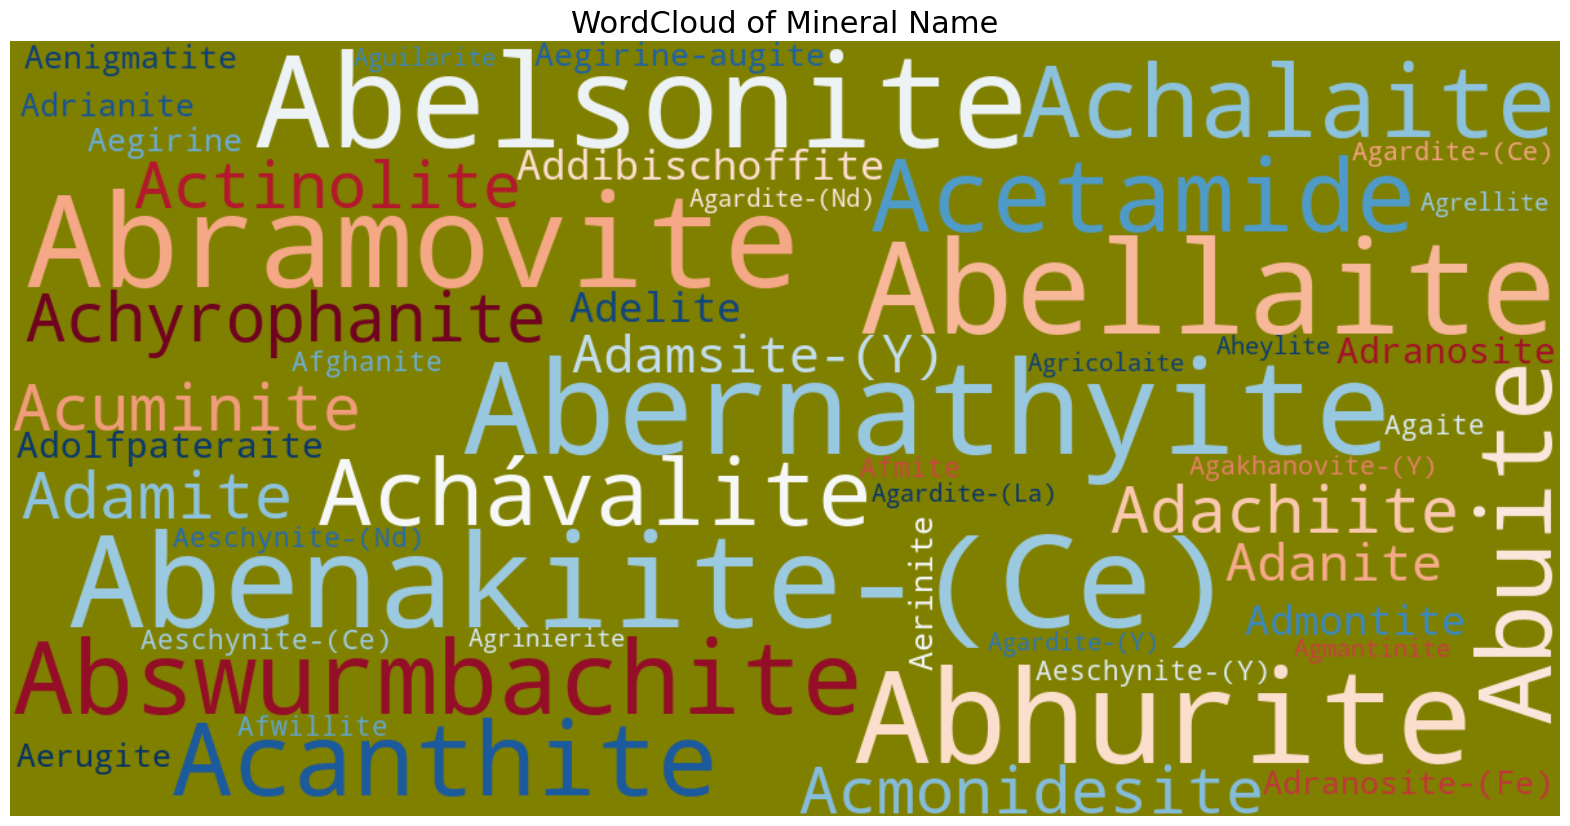

In [66]:
freq_mineral = Freq_mineral(mineral['Mineral Name'].values.tolist())

data = dict(zip(freq_mineral['Term'].tolist(), freq_mineral['Frequency'].tolist()))

data = freq_mineral.set_index('Term').to_dict()['Frequency']


Word_Cloud(data, 'Red', 'RdBu', 'WordCloud of Mineral Name')

### Region Where Minerals Are Common

In [67]:
Country_of_Type_Locality_count= mineral['Country of Type Locality'].value_counts()
Country_of_Type_Locality_count

USA                                           814
Russia                                        810
Italy                                         356
Germany                                       343
Canada                                        231
                                             ... 
Russia / Kazakhstan / Namibia / Bulgaria        1
Georgia / Israel                                1
Democratic Republic of the Congo / Namibia      1
Switzerland / Australia                         1
Portugal / Germany                              1
Name: Country of Type Locality, Length: 233, dtype: int64

In [68]:
Locality = Country_of_Type_Locality_count[ :20]

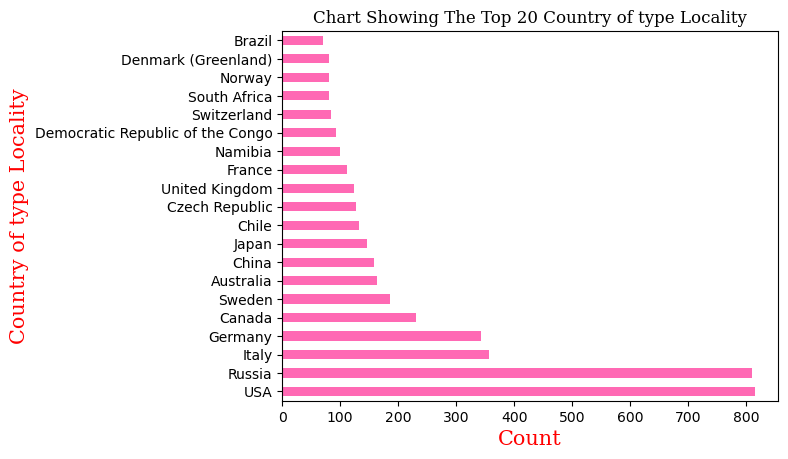

In [69]:
Locality.plot(kind = 'barh', color='hotpink')

font1= {'family':'serif', 'color':'black', 'size':12}
font2= {'family':'serif', 'color':'red', 'size':15}


plt.title('Chart Showing The Top 20 Country of type Locality', fontdict=font1)
plt.xlabel('Count', fontdict=font2)
plt.ylabel('Country of type Locality', fontdict=font2)
plt.show()

From the above chart, Minerals are common in the USA, followed by Russia. Brazil, Norway, has low minerals

### Geological Processes(Oldest Known Age(Ma))

In [70]:
 mineral['Oldest Known Age (Ma)'].value_counts()

1271.835004    973
413.600000     147
0.000036       120
0.000000       117
2500.000000    107
              ... 
153.000000       1
563.000000       1
128.200000       1
1880.700000      1
685.000000       1
Name: Oldest Known Age (Ma), Length: 632, dtype: int64

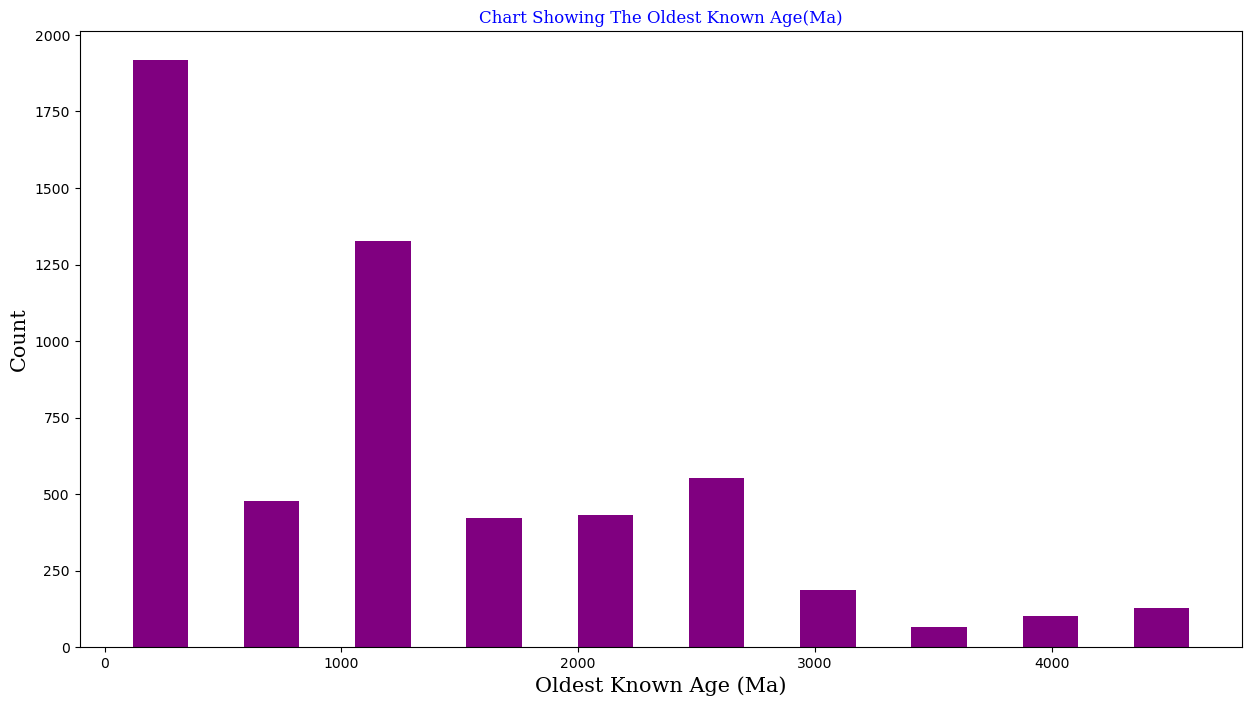

In [71]:
#find the top 10 OLdest Known Age(Ma)
mineral_count = mineral.sort_values('Oldest Known Age (Ma)')
top_10_earning = mineral_count[ :10]

#list of titles of top ten Oldest known Age(Ma)
top_rating= list(top_10_earning)

font1= {'family':'serif', 'color':'blue', 'size':12}
font2= {'family':'serif', 'color':'black', 'size':15}


#plot the histogram
plt.figure(figsize = (15, 8))
plt.hist(mineral['Oldest Known Age (Ma)'], histtype='bar', rwidth=0.5, color='purple')
plt.title( 'Chart Showing The Oldest Known Age(Ma)', fontdict = font1)
plt.xlabel('Oldest Known Age (Ma)', fontdict= font2)
plt.ylabel('Count', fontdict= font2)
plt.show()


In [72]:
mineral['Year First Published'].value_counts()

2013    131
2018    125
2019    116
2015    113
2020    108
       ... 
1788      1
1799      1
1767      1
1685      1
1784      1
Name: Year First Published, Length: 250, dtype: int64

### Mineral Status

In [73]:
Total_IMA_Status = mineral['IMA Status'].value_counts()
Total_IMA_Status

Approved                                               3600
Approved,Grandfathered                                 1094
Approved,Redefined                                      355
Approved,Renamed                                        264
Approved,Pending publication                            245
Approved,Questionable mineral species                    28
Approved,Grandfathered,Renamed                            8
Approved,Grandfathered,Redefined                          7
Approved,Redefined,Renamed                                6
Approved,Grandfathered,Questionable mineral species       1
Approved,Pending publication,Redefined                    1
Approved,Grandfathered,Pending publication,Renamed        1
Name: IMA Status, dtype: int64

3600 minerals were approved and 355 minerals were approved and renamed. Below is the graphical representation of the IMA Status of the minerals.

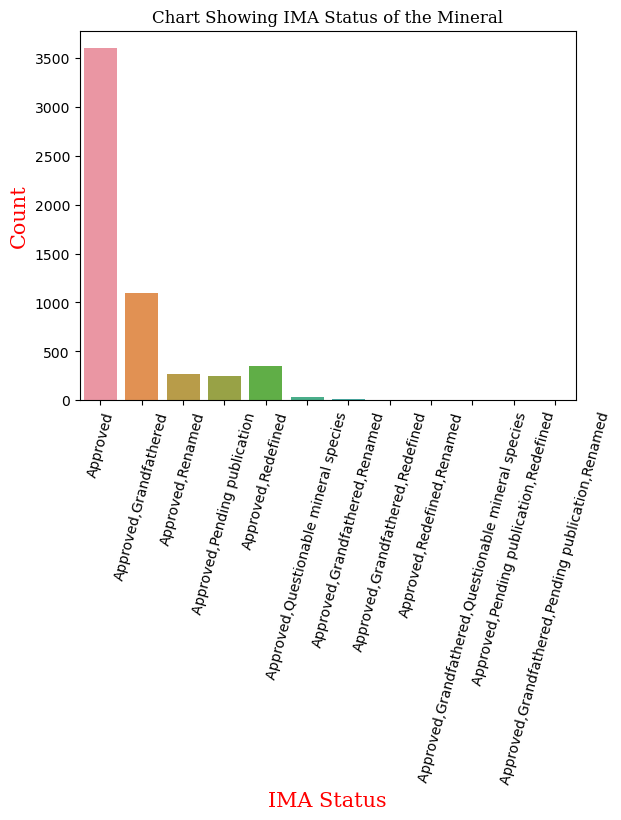

In [74]:
#find the top 10 IMA Status
mineral_count = mineral.sort_values('IMA Status')
top_10_earning = mineral_count[ :10]

#list of titles of top 10 highest IMA Status
top_rating= list(top_10_earning)

font1= {'family':'serif', 'color':'blue', 'size':12}
font2= {'family':'serif', 'color':'black', 'size':15}


sns.countplot(x = 'IMA Status',  data= mineral)
font1= {'family':'serif', 'color':'black', 'size':12}
font2= {'family':'serif', 'color':'red', 'size':15}

plt.xticks(rotation=75, color='black')
plt.title('Chart Showing IMA Status of the Mineral', fontdict=font1)
plt.xlabel('IMA Status', fontdict=font2)
plt.ylabel('Count', fontdict=font2)
plt.show()

### Mineral Classification (Abudance Chemical Elements)

In [75]:
Chemistry_Elements_count= mineral['Chemistry Elements'].value_counts()
Chemistry_Elements_count

Fe P O H                   23
Ca Si O H                  21
Fe S O H                   19
Ca Al Si O H               19
Ca B O H                   17
                           ..
K Nb O                      1
Na Ca Zr Fe Si Nb O H C     1
Cs Li Ti Fe Si O F H        1
Na Zn S O H Cl              1
Fe P O F                    1
Name: Chemistry Elements, Length: 3801, dtype: int64

In [76]:
First_15_Chemistry_Elements= Chemistry_Elements_count[ :15]

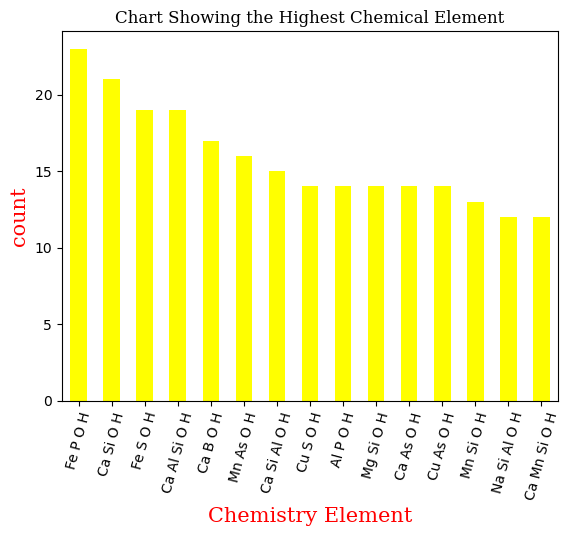

In [77]:
#plot bar chart
First_15_Chemistry_Elements.plot(kind = 'bar', color='yellow')

font1= {'family':'serif', 'color':'black', 'size':12}
font2= {'family':'serif', 'color':'red', 'size':15}

plt.xticks(rotation=75, color='black')
plt.title('Chart Showing the Highest Chemical Element', fontdict=font1)
plt.xlabel('Chemistry Element', fontdict=font2)
plt.ylabel('count', fontdict=font2)
plt.show()

From the above chart, FE P OH is the abundant chemical elements.

### Mineral Properties

In [78]:
Crystal_System_count=mineral['Crystal Systems'].value_counts()
Crystal_System_count

monoclinic                         1799
orthorhombic                       1043
hexagonal                          1004
triclinic                           573
cubic                               474
                                   ... 
rhombohedral|hexagonal                1
unknown|hexagonal                     1
monoclinic|rhombohedral               1
cubic|orthorhombic, triclinic         1
hexagonal|monoclinic, amorphous       1
Name: Crystal Systems, Length: 81, dtype: int64

In [79]:
First_15_Crystal_System= Crystal_System_count[ :15]

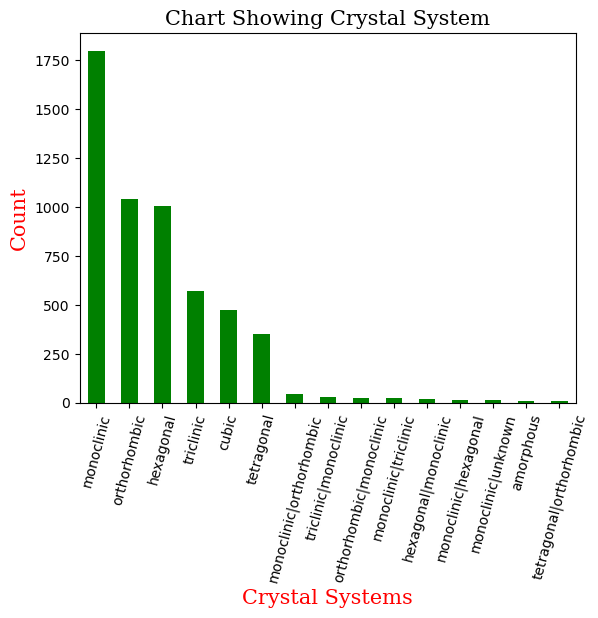

In [80]:
#plot bar chart
First_15_Crystal_System.plot(kind = 'bar', color='green')

font1= {'family':'serif', 'color':'black', 'size':15}
font2= {'family':'serif', 'color':'red', 'size':15}

plt.xticks(rotation=75, color='black')
plt.title('Chart Showing Crystal System', fontdict=font1)
plt.xlabel('Crystal Systems', fontdict=font2)
plt.ylabel('Count', fontdict=font2)
plt.show()

In [81]:
Valence_Elements_count=mineral['Valence Elements'].value_counts()
Valence_Elements_count

Ca Si O H                            22
Ca B O H                             17
Ca Al Si O H                         17
Ca Si Al O H                         16
Cu^2+ As^5+ O H                      14
                                     ..
Pb^2+ Sr Y^3+ Mn^2+ Fe^3+ Ti^4+ O     1
Ni V P                                1
Sr^2+ Al As^5+ O H                    1
Mg Al O B Si                          1
Fe^2+ P O F                           1
Name: Valence Elements, Length: 4056, dtype: int64

In [82]:
First_15_Valence_Elements= Valence_Elements_count[ :15]

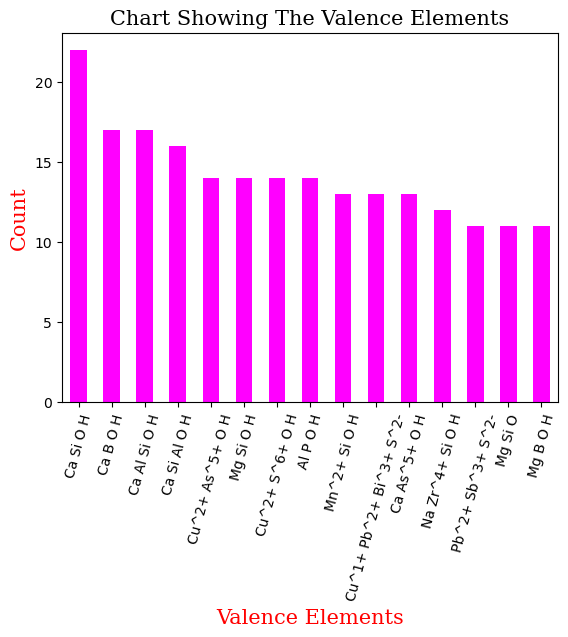

In [83]:
#plot a bar chart
First_15_Valence_Elements.plot(kind = 'bar', color='Magenta')

font1= {'family':'serif', 'color':'black', 'size':15}
font2= {'family':'serif', 'color':'red', 'size':15}

plt.xticks(rotation=75, color='black')
plt.title('Chart Showing The Valence Elements', fontdict=font1)
plt.xlabel('Valence Elements', fontdict=font2)
plt.ylabel('Count', fontdict=font2)
plt.show()

<Axes: >

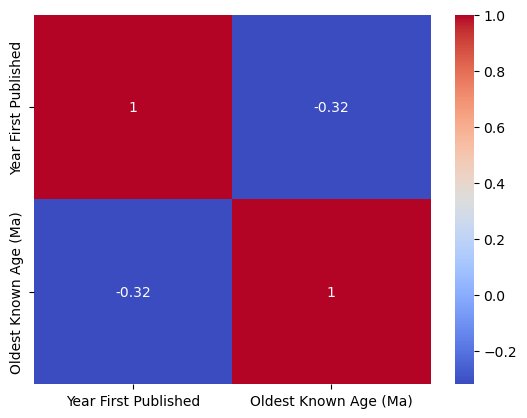

In [84]:
#Correlation between Year First Published and Oldest Known Age(Ma)

mineral.corr(numeric_only=True)

sns.heatmap(mineral.corr(numeric_only=True), cmap="coolwarm", annot=True)

From our heatamap above, we can infer that there is a correlation with a value of 1 and -0.32 respectively.

## Conclusion


3600 minerals were approved.

USA is the region where minerals are common although USA has 814 minerals while Russia has 810 minerals. 

Fe P OH is the most abundant chemical elements with 23 minerals.

The minerals are mostly monoclinic, orthorhombic and hexagonal crystal systems. 1799 minerals were monoclinic crystal system, 1043 minerals were orthorhombic crystal and 1004 minerals are hexagonal crystal system.

The Oldest Known Age(Ma) is 1271.84.

There is a correlation between Year First Published and Oldest Known Age with a value of 1 and -0.32 respectively.

### Recommendation




Based on the analysis, USA is the region with high concentration of minerals, the company should focus more on the region.The company should prioritize exploring areas with high concentration.

Exploring areas with high concentration of mineral with unique properties such as the monoclinic crystal system or high valence elements like CA SI OH. 

By taking these factors into account, there is a likelihood of increase in finding new mineral deposits. 